In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = np.array([[3,1,0,0], [1,2,0,1], [0,0,1,1], [0,1,1,1]])

#### найдём точные собственные значения и векторы для нашей матрицы

In [5]:
eigvalA, eigvecA = np.linalg.eig(A)
print(eigvalA, eigvecA, sep='\n')

[ 3.75080042 -0.28399787  1.21473855  2.3184589 ]
[[-0.77250966  0.11203111 -0.35688275  0.51313991]
 [-0.58000058 -0.36790993  0.63712901 -0.34972594]
 [-0.08832178 -0.56719284 -0.66792899 -0.4736691 ]
 [-0.2429556   0.7282744  -0.1434301  -0.62451324]]


#### метод степенной итерации

In [163]:
N = 15
randomVec = np.random.random(4)
iterVec = np.zeros((N, 4))
iterVec[0] = randomVec/np.linalg.norm(randomVec)
iterVal = np.zeros(N)
iterVal[0] = (iterVec[0].T @ A @ iterVec[0]) / (iterVec[0].T @ iterVec[0])

In [164]:
k,flag = 0, 0
for i in range(1, N):
    vec = A @ iterVec[i-1]
    iterVec[i] = vec / np.linalg.norm(vec)
    iterVal[i] = (iterVec[i].T @ A @ iterVec[i]) / (iterVec[i].T @ iterVec[i])
    k += 1
    if np.linalg.norm(iterVec[i] - eigvecA.T[0]) < 10**(-2) or np.linalg.norm(iterVec[i] + eigvecA.T[0]) < 10**(-2) and flag == 0:
        print('Собственный вектор приближается с точностью до тысячной (по норме) на {} шаге'.format(k))
        flag += 1

Собственный вектор приближается с точностью до тысячной (по норме) на 10 шаге


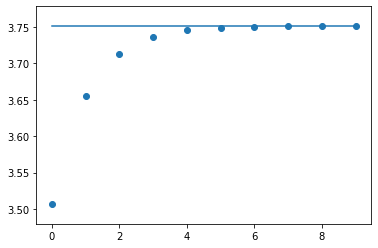

In [54]:
plt.scatter(np.arange(len(iterVal)), iterVal)
plt.plot(np.arange(len(iterVal)), [np.max(eigvalA)] * len(iterVal))

#### обратная итерация с $\mu$ = 3.5 (тот же случайный начальный вектор)

In [157]:
N = 10
mu = 3.5
revIterVec = np.zeros((N, 4))
revIterVec[0] = randomVec/np.linalg.norm(randomVec)
revIterVal = np.zeros(N)
revIterVal[0] = (revIterVec[0].T @ A @ revIterVec[0]) / (revIterVec[0].T @ revIterVec[0])
M = np.array([mu]*4)
D = np.linalg.inv(A - np.diag(M))

In [158]:
k,flag = 0, 0
approxVec = eigvecA.T[np.abs(eigvalA - M).argmin()]
for i in range(1, N):
    vec = D @ revIterVec[i-1]
    revIterVec[i] = vec / np.linalg.norm(vec)
    revIterVal[i] = (revIterVec[i].T @ A @ revIterVec[i]) / (revIterVec[i].T @ revIterVec[i])
    k += 1
    if np.linalg.norm(revIterVec[i] - approxVec) < 10**(-2) or np.linalg.norm(revIterVec[i] + approxVec) < 10**(-3) and flag==0:
            print('Собственный вектор приближается с точностью до тысячной (по норме) на {} шаге'.format(k))
            flag = 1

Собственный вектор приближается с точностью до тысячной (по норме) на 5 шаге


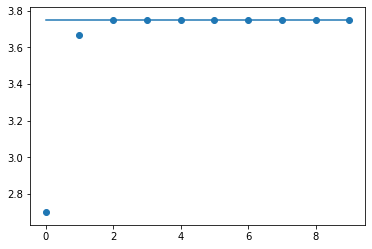

In [159]:
plt.scatter(np.arange(len(revIterVal)), revIterVal)
plt.plot(np.arange(len(revIterVal)), [eigvalA[(np.abs(eigvalA - M)).argmin()]] * len(revIterVal))

#### обратная итерация с $\mu$ = 3.7 (тот же случайный начальный вектор)

In [160]:
N = 10
mu = 3.7
revIterVec = np.zeros((N, 4))
revIterVec[0] = randomVec/np.linalg.norm(randomVec)
revIterVal = np.zeros(N)
revIterVal[0] = (revIterVec[0].T @ A @ revIterVec[0]) / (revIterVec[0].T @ revIterVec[0])
M = np.array([mu]*4)
D = np.linalg.inv(A - np.diag(M))

In [161]:
k,flag = 0, 0
approxVec = eigvecA.T[np.abs(eigvalA - M).argmin()]
for i in range(1, N):
    vec = D @ revIterVec[i-1]
    revIterVec[i] = vec / np.linalg.norm(vec)
    revIterVal[i] = (revIterVec[i].T @ A @ revIterVec[i]) / (revIterVec[i].T @ revIterVec[i])
    k += 1
    if np.linalg.norm(revIterVec[i] - approxVec) < 10**(-2) or np.linalg.norm(revIterVec[i] + approxVec) < 10**(-3) and flag==0:
            print('Собственный вектор приближается с точностью до тысячной (по норме) на {} шаге'.format(k))
            flag = 1

Собственный вектор приближается с точностью до тысячной (по норме) на 3 шаге


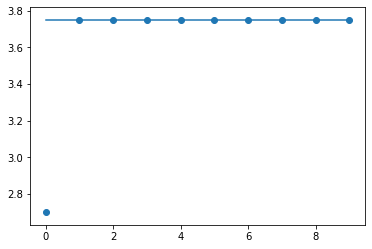

In [162]:
plt.scatter(np.arange(len(revIterVal)), revIterVal)
plt.plot(np.arange(len(revIterVal)), [eigvalA[(np.abs(eigvalA - M)).argmin()]] * len(revIterVal))